In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

import project_functions as pf
df = pd.read_csv('housing.csv')


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_cleaned = df

In [27]:
#drop columns with >40% null values
NA_val = df.isna().sum() 
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    col_passdf_cleaned = df_cleaned[na_filter(NA_val)]
    return col_passdf_cleaned
df_cleaned.head()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.84,52.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [ ]:
df_cleaned = df_cleaned.dropna()

In [5]:
#remove rows with null values
df_cleaned = df_cleaned.dropna()
#remove duplicate locations 
df_cleaned = df_cleaned.drop_duplicates(subset=['latitude', 'longitude'])
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns=['index', 'total_rooms'])
print("Rows vs Columns are "+ str(df_cleaned.shape))

Rows vs Columns are (12507, 9)


In [ ]:
df_cleaned['total_rooms'].describe()

In [ ]:
count_households = plt.hist(df_cleaned['households'], bins = 100)

In [ ]:
df_cleaned['households'].describe()

In [ ]:
count_houseval = plt.hist(df_cleaned['median_house_value'], bins = 1000)


In [8]:
#remove outliers
df_cleaned = df_cleaned [df_cleaned['population']<15000]
df_cleaned = df_cleaned [df_cleaned['median_house_value']<500000]

df_cleaned = df_cleaned [df_cleaned['households']<3000]


In [ ]:
df_cleaned['population'].describe()

In [ ]:
df_cleaned['median_house_value'].describe()

In [ ]:
df_cleaned['total_rooms'].describe()

In [ ]:
df_cleaned['households'].describe()

<AxesSubplot:>

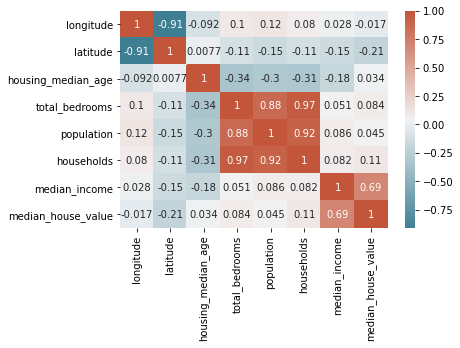

In [9]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Creating scatters with the relationships shown in the heatmap


<AxesSubplot:xlabel='households', ylabel='population'>

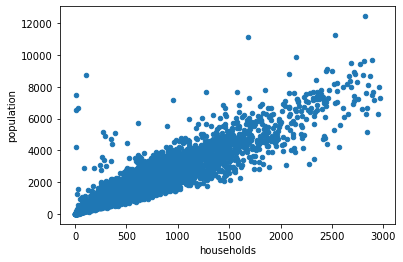

In [13]:
#households vs population = strong positive
 df_cleaned.plot(kind='scatter', x='households', y='population')


<AxesSubplot:xlabel='total_bedrooms', ylabel='population'>

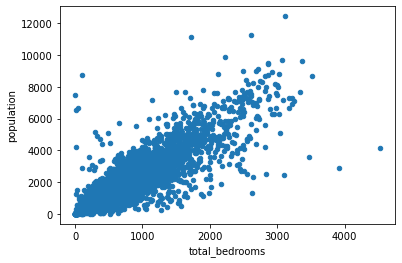

In [11]:
#total bedrooms vs population = strong positive

df_cleaned.plot(kind='scatter', x='total_bedrooms', y='population')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

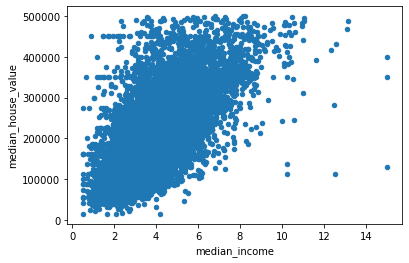

In [12]:
#Median income vs median house value = strong positive

df_cleaned.plot(kind='scatter', x='median_income', y='median_house_value')

<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>

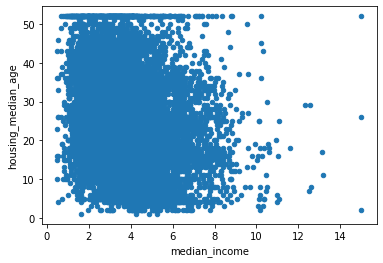

In [15]:
#median income vs median age = weak negative
df_cleaned.plot(kind='scatter', x='median_income', y='housing_median_age')


<AxesSubplot:xlabel='total_bedrooms', ylabel='housing_median_age'>

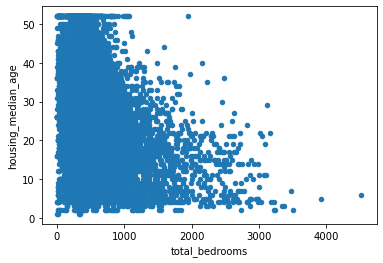

In [17]:
#total bedrooms vs housing median age = weak negative
df_cleaned.plot(kind='scatter', x='total_bedrooms', y='housing_median_age')

<AxesSubplot:xlabel='population', ylabel='housing_median_age'>

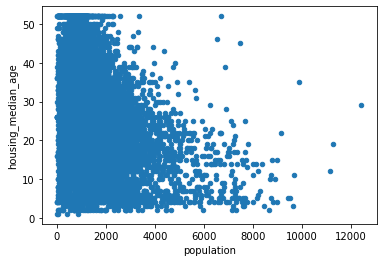

In [18]:
#population vs housing median age = weak negative
df_cleaned.plot(kind='scatter', x='population', y='housing_median_age')

<AxesSubplot:xlabel='households', ylabel='housing_median_age'>

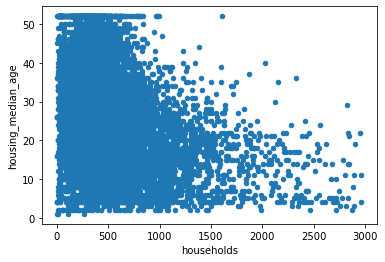

In [19]:
#households vs housing median age = weak negative
df_cleaned.plot(kind='scatter', x='households', y='housing_median_age')

<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>

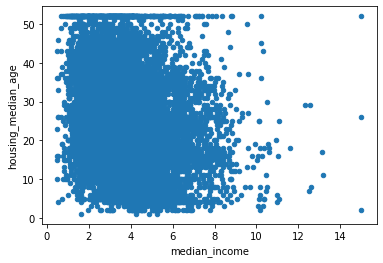

In [21]:
#median income vs housing median age = weak negative
df_cleaned.plot(kind='scatter', x='median_income', y='housing_median_age')

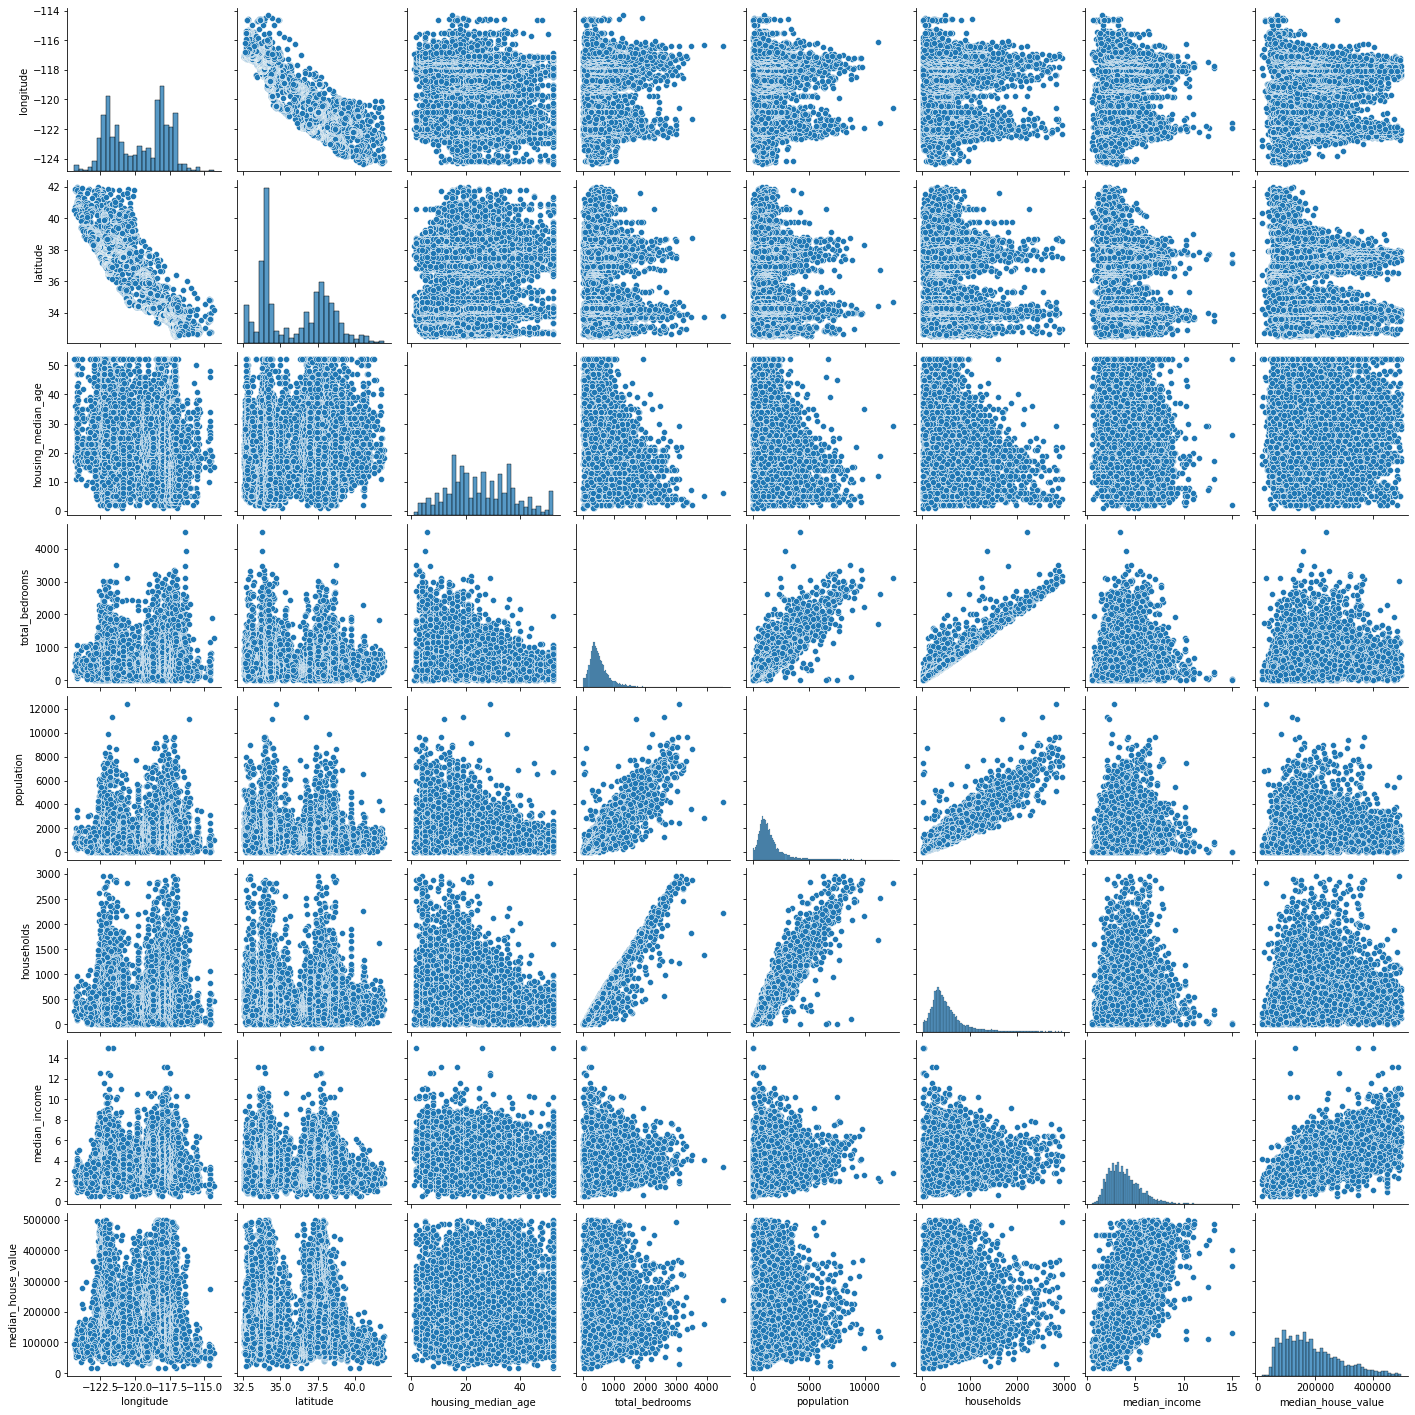

In [22]:
sns.pairplot(df_cleaned)


<AxesSubplot:>

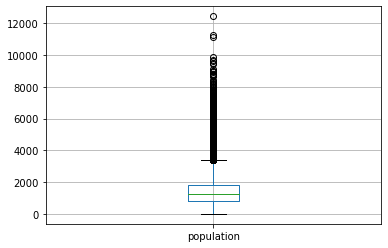

In [23]:
df_cleaned.boxplot('population')

<AxesSubplot:>

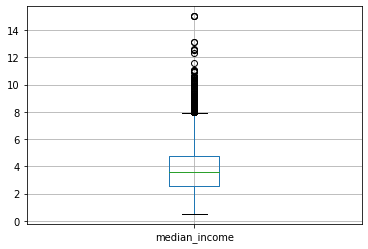

In [25]:
df_cleaned.boxplot('median_income')

<AxesSubplot:>

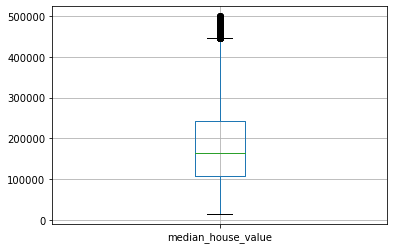

In [26]:
df_cleaned.boxplot('median_house_value')